# A more structured bottom-up visualisation of ml results

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [6]:
svm_df = pd.read_csv('../ML_results/SVM_permutations/SVM_results.csv')


## 4q

In [23]:
df_4q = svm_df[svm_df['nr_qubits']==4]
df_4q.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1110,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000
1,4,1110,Hardware,111,Simulation,111,0,linear,0,0.256667,NaN,NaN,NaN,NaN,NaN
2,4,1110,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.156667,NaN,NaN,NaN,NaN,NaN
3,4,1110,Hardware,111,Sim and Refreshed,111,0,linear,0,0.206667,NaN,NaN,NaN,NaN,NaN
4,4,1110,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833


### HSR - all circuits


In [54]:
def get_df_with_same(col1,col2,df, drop_same_cols = True):
    df_ = df[df[col1]==df[col2]]
    if drop_same_cols:
        df_ = df_.drop(col1,axis=1)
        df_ = df_.drop(col2,axis=1)
    return df_

def add_avg_cv_col(df):
    df_ = df
    df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)
    return df_

def drop_cvs(df):
    cvs = ['cv_1','cv_2','cv_3','cv_4','cv_5']
    for cv in cvs:
        df=df.drop(cv,axis = 1)
    return df

def one_hot_to_int(df):
    one_hots = ['machines','tr&v circuits','test circuits']
    for col in one_hots:
        df[col] = df[col].astype(str)
        df[col]=df[col].apply(lambda x: int(x, 2))
    return df

def drop_preproc(df):
    df_ = df.drop('preprocess settings',axis =1)
    return df_

def make_easy2plot(df,drop_nr_q = True):
    df_ = df
    df_ = add_avg_cv_col(df_)
    df_ = drop_cvs(df_)
    df_ = drop_preproc(df_)
    if drop_nr_q:
        df_ = df_.drop('nr_qubits',axis = 1)
    return df_



In [36]:
df_4q_all_circ = df_4q[df_4q['tr&v circuits']==111]
df_4q_all_circ.head()

,nr_qubits,machines,tr&v exp_type,tr&v circuits,test exp_type,test circuits,preprocess settings,kernal,param settings,accuracy,cv_1,cv_2,cv_3,cv_4,cv_5
0,4,1110,Hardware,111,Hardware,111,0,linear,0,0.992248,1.000000,0.980583,1.000000,0.990196,1.000000
1,4,1110,Hardware,111,Simulation,111,0,linear,0,0.256667,NaN,NaN,NaN,NaN,NaN
2,4,1110,Hardware,111,Refreshed_Simulation,111,0,linear,0,0.156667,NaN,NaN,NaN,NaN,NaN
3,4,1110,Hardware,111,Sim and Refreshed,111,0,linear,0,0.206667,NaN,NaN,NaN,NaN,NaN
4,4,1110,Simulation,111,Simulation,111,0,linear,0,0.662500,0.661458,0.588542,0.609375,0.661458,0.645833


In [55]:

df_4q_all_circ= get_df_with_same('tr&v circuits','test circuits',df_4q_all_circ)

#### Train on Hardware:

In [56]:
df_4q_c111_tr_H = df_4q_all_circ[df_4q_all_circ['tr&v exp_type']=='Hardware']
df_4q_c111_tr_H = make_easy2plot(df_4q_c111_tr_H)


C:\Users\epste\AppData\Local\Temp\ipykernel_32428\2462721650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,'cv_avg']=df_.loc[:,'cv_1':'cv_5'].mean(axis =1)


In [57]:
df_4q_c111_tr_H.head()

,machines,tr&v exp_type,test exp_type,kernal,param settings,accuracy,cv_avg
0,1110,Hardware,Hardware,linear,0,0.992248,0.994156
1,1110,Hardware,Simulation,linear,0,0.256667,NaN
2,1110,Hardware,Refreshed_Simulation,linear,0,0.156667,NaN
3,1110,Hardware,Sim and Refreshed,linear,0,0.206667,NaN
12,1110,Hardware,Hardware,poly,1,1.000000,0.998058


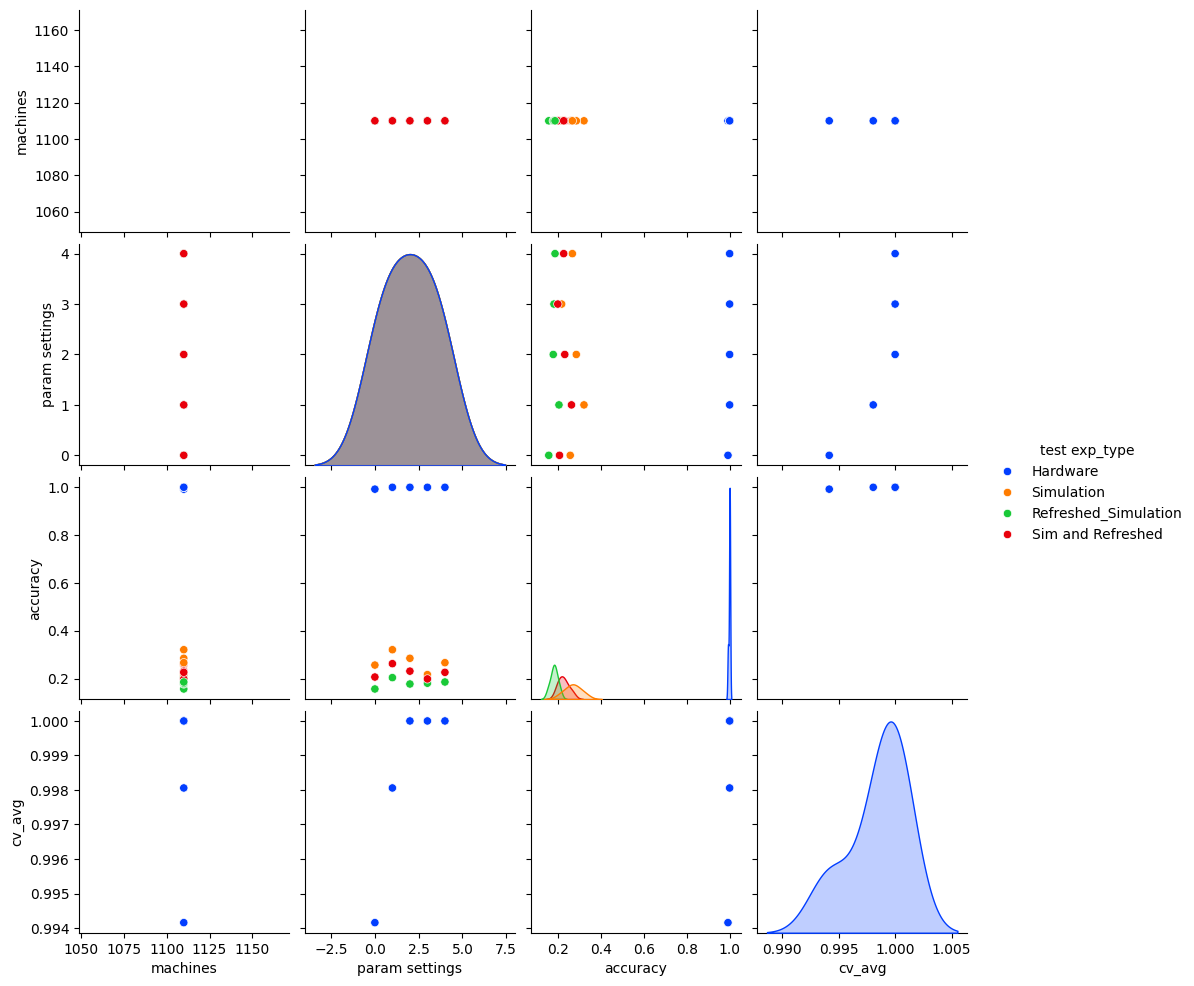

In [58]:
sns.pairplot(data=df_4q_c111_tr_H, hue = 'test exp_type',palette='bright')